<a href="https://colab.research.google.com/github/AlexandreBourrieau/ML2/blob/main/TimeSeries_Seq_2_Seq/Seq2Seq_Basique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

import random
import numpy as np
import matplotlib.pyplot as plt

from keras import backend as K

# Chargement et correction des données

**1. Chargement des données**

Nous utilisons les données du site [Machine Learning Repository](https://archive.ics.uci.edu/ml/index.html) : [Individual household electric power consumption Data Set](https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption)

In [76]:
!rm *.csv
!rm *.rar
!curl --location --remote-header-name --remote-name "https://github.com/AlexandreBourrieau/FICHIERS/raw/main/Series_Temporelles/Seq2Seq/Data/household_power_consumption.rar"
!unrar e household_power_consumption.rar

rm: cannot remove '*.txt': No such file or directory
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   196  100   196    0     0    739      0 --:--:-- --:--:-- --:--:--   739
100 20.9M  100 20.9M    0     0  22.9M      0 --:--:-- --:--:-- --:--:-- 63.4M

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from household_power_consumption.rar


Would you like to replace the existing file household_power_consumption.csv
144250305 bytes, modified on 2021-06-06 10:55
with a new one
142226550 bytes, modified on 2021-06-06 10:36

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit Y

Extracting  household_power_consumption.csv                               19% 38% 57% 76% 95% 99%  OK 
All OK


**2. Analyse et correction des données**

In [77]:
# Création de la série sous Pandas
df_data = pd.read_csv("household_power_consumption.csv")
df_data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,16/12/2006 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,1,16/12/2006 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2,16/12/2006 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,3,16/12/2006 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,4,16/12/2006 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,2075254,26/11/2010 20:58:00,0.946,0,240.43,4,0,0,0.0
2075255,2075255,26/11/2010 20:59:00,0.944,0,240,4,0,0,0.0
2075256,2075256,26/11/2010 21:00:00,0.938,0,239.82,3.8,0,0,0.0
2075257,2075257,26/11/2010 21:01:00,0.934,0,239.7,3.8,0,0,0.0


Affiche les types :

In [78]:
df_data.dtypes

Unnamed: 0                 int64
Date                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

Converison des types `object` en `float32` :

In [79]:
df_data.iloc[:,2:] = pd.DataFrame.replace(df_data.iloc[:,2:],"?","NaN")
df_data.iloc[:,2:] = df_data.iloc[:,2:].astype(np.float32)
df_data

,Unnamed: 0,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,16/12/2006 17:24:00,4.216,0.418,234.839996,18.4,0.0,1.0,17.0
1,1,16/12/2006 17:25:00,5.360,0.436,233.630005,23.0,0.0,1.0,16.0
2,2,16/12/2006 17:26:00,5.374,0.498,233.289993,23.0,0.0,2.0,17.0
3,3,16/12/2006 17:27:00,5.388,0.502,233.740005,23.0,0.0,1.0,17.0
4,4,16/12/2006 17:28:00,3.666,0.528,235.679993,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,2075254,26/11/2010 20:58:00,0.946,0.000,240.429993,4.0,0.0,0.0,0.0
2075255,2075255,26/11/2010 20:59:00,0.944,0.000,240.000000,4.0,0.0,0.0,0.0
2075256,2075256,26/11/2010 21:00:00,0.938,0.000,239.820007,3.8,0.0,0.0,0.0
2075257,2075257,26/11/2010 21:01:00,0.934,0.000,239.699997,3.8,0.0,0.0,0.0


In [80]:
df_data.dtypes

Unnamed: 0                 int64
Date                      object
Global_active_power      float32
Global_reactive_power    float32
Voltage                  float32
Global_intensity         float32
Sub_metering_1           float32
Sub_metering_2           float32
Sub_metering_3           float32
dtype: object

On supprime la colonne "Unnamed: 0" :

In [81]:
df_data = df_data.drop("Unnamed: 0",axis=1)
df_data

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006 17:24:00,4.216,0.418,234.839996,18.4,0.0,1.0,17.0
1,16/12/2006 17:25:00,5.360,0.436,233.630005,23.0,0.0,1.0,16.0
2,16/12/2006 17:26:00,5.374,0.498,233.289993,23.0,0.0,2.0,17.0
3,16/12/2006 17:27:00,5.388,0.502,233.740005,23.0,0.0,1.0,17.0
4,16/12/2006 17:28:00,3.666,0.528,235.679993,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...
2075254,26/11/2010 20:58:00,0.946,0.000,240.429993,4.0,0.0,0.0,0.0
2075255,26/11/2010 20:59:00,0.944,0.000,240.000000,4.0,0.0,0.0,0.0
2075256,26/11/2010 21:00:00,0.938,0.000,239.820007,3.8,0.0,0.0,0.0
2075257,26/11/2010 21:01:00,0.934,0.000,239.699997,3.8,0.0,0.0,0.0


In [82]:
df_data

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006 17:24:00,4.216,0.418,234.839996,18.4,0.0,1.0,17.0
1,16/12/2006 17:25:00,5.360,0.436,233.630005,23.0,0.0,1.0,16.0
2,16/12/2006 17:26:00,5.374,0.498,233.289993,23.0,0.0,2.0,17.0
3,16/12/2006 17:27:00,5.388,0.502,233.740005,23.0,0.0,1.0,17.0
4,16/12/2006 17:28:00,3.666,0.528,235.679993,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...
2075254,26/11/2010 20:58:00,0.946,0.000,240.429993,4.0,0.0,0.0,0.0
2075255,26/11/2010 20:59:00,0.944,0.000,240.000000,4.0,0.0,0.0,0.0
2075256,26/11/2010 21:00:00,0.938,0.000,239.820007,3.8,0.0,0.0,0.0
2075257,26/11/2010 21:01:00,0.934,0.000,239.699997,3.8,0.0,0.0,0.0


**3. Sélection des données sur l'année 2009-2010**

In [84]:
df_data

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
16/12/2006 17:24:00,16/12/2006 17:24:00,4.216,0.418,234.839996,18.4,0.0,1.0,17.0
16/12/2006 17:25:00,16/12/2006 17:25:00,5.360,0.436,233.630005,23.0,0.0,1.0,16.0
16/12/2006 17:26:00,16/12/2006 17:26:00,5.374,0.498,233.289993,23.0,0.0,2.0,17.0
16/12/2006 17:27:00,16/12/2006 17:27:00,5.388,0.502,233.740005,23.0,0.0,1.0,17.0
16/12/2006 17:28:00,16/12/2006 17:28:00,3.666,0.528,235.679993,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...
26/11/2010 20:58:00,26/11/2010 20:58:00,0.946,0.000,240.429993,4.0,0.0,0.0,0.0
26/11/2010 20:59:00,26/11/2010 20:59:00,0.944,0.000,240.000000,4.0,0.0,0.0,0.0
26/11/2010 21:00:00,26/11/2010 21:00:00,0.938,0.000,239.820007,3.8,0.0,0.0,0.0


In [112]:
# Définition des dates de début et de fin

date_debut = "10/10/2009 00:00:00"
date_fin = "26/11/2010 21:02:00"

# Place l'index du dataframe sur la colonne Date
df_data = df_data.set_index(df_data['Date'])

# Copie des données dans le dataframe d'étude sur l'intervalle d'étude
df_etude = df_data.loc[date_debut:date_fin].copy()

# Conversion de la colonne Date au format datetime
df_etude.index = pd.to_datetime(df_etude.index)

df_etude

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
2009-10-10 00:00:00,10/10/2009 00:00:00,0.412,0.260,242.759995,2.0,0.0,1.0,1.0
2009-10-10 00:01:00,10/10/2009 00:01:00,0.410,0.260,242.759995,2.0,0.0,1.0,1.0
2009-10-10 00:02:00,10/10/2009 00:02:00,0.408,0.260,242.710007,2.0,0.0,2.0,0.0
2009-10-10 00:03:00,10/10/2009 00:03:00,0.338,0.158,242.729996,1.4,0.0,1.0,1.0
2009-10-10 00:04:00,10/10/2009 00:04:00,0.314,0.122,242.509995,1.4,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,26/11/2010 20:58:00,0.946,0.000,240.429993,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,26/11/2010 20:59:00,0.944,0.000,240.000000,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,26/11/2010 21:00:00,0.938,0.000,239.820007,3.8,0.0,0.0,0.0


**4. Echantillonnage des données sur 1 heure**

In [114]:
# Echantillonnage de la série sur 1 heure
df_heure = df_etude.resample('1H').asfreq()
df_heure

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
2009-01-11 00:00:00,1/11/2009 00:00:00,0.290,0.080,242.380005,1.2,0.0,0.0,0.0
2009-01-11 01:00:00,1/11/2009 01:00:00,0.858,0.152,241.809998,3.6,0.0,0.0,11.0
2009-01-11 02:00:00,1/11/2009 02:00:00,0.308,0.102,243.970001,1.2,0.0,0.0,1.0
2009-01-11 03:00:00,1/11/2009 03:00:00,1.030,0.430,243.509995,4.6,0.0,1.0,11.0
2009-01-11 04:00:00,1/11/2009 04:00:00,0.224,0.000,245.460007,0.8,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2010-12-11 19:00:00,12/11/2010 19:00:00,3.410,0.156,230.119995,14.8,0.0,0.0,0.0
2010-12-11 20:00:00,12/11/2010 20:00:00,1.624,0.000,230.220001,7.0,1.0,0.0,17.0
2010-12-11 21:00:00,12/11/2010 21:00:00,0.774,0.152,236.169998,3.2,2.0,1.0,0.0


Vérification des données et correction des anomalies :

In [122]:
data_manquantes = sum(np.isnan(df_heure['Global_active_power']))
print ("Données manquantes : %s" %data_manquantes)


Données manquantes : 7185


In [123]:
# Applique la fonction de remplissage automatique des données non numérique avec l'option backfill
df_heure = df_heure.interpolate(method="slinear")
df_heure = df_heure.fillna(method="backfill")

In [124]:
data_manquantes = sum(np.isnan(df_heure['Global_active_power']))
print ("Données manquantes : %s" %data_manquantes)

Données manquantes : 0


In [127]:
df_heure

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
2009-01-11 00:00:00,1/11/2009 00:00:00,0.290,0.080,242.380005,1.2,0.0,0.0,0.0
2009-01-11 01:00:00,1/11/2009 01:00:00,0.858,0.152,241.809998,3.6,0.0,0.0,11.0
2009-01-11 02:00:00,1/11/2009 02:00:00,0.308,0.102,243.970001,1.2,0.0,0.0,1.0
2009-01-11 03:00:00,1/11/2009 03:00:00,1.030,0.430,243.509995,4.6,0.0,1.0,11.0
2009-01-11 04:00:00,1/11/2009 04:00:00,0.224,0.000,245.460007,0.8,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2010-12-11 19:00:00,12/11/2010 19:00:00,3.410,0.156,230.119995,14.8,0.0,0.0,0.0
2010-12-11 20:00:00,12/11/2010 20:00:00,1.624,0.000,230.220001,7.0,1.0,0.0,17.0
2010-12-11 21:00:00,12/11/2010 21:00:00,0.774,0.152,236.169998,3.2,2.0,1.0,0.0


**5. Affiche les données**

In [133]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_heure.index,y=df_heure['Global_active_power'], line=dict(color='blue', width=1),name="Global_active_power"))
fig.update_xaxes(rangeslider_visible=True)
yaxis=dict(autorange = True,fixedrange= False)
fig.update_yaxes(yaxis)
fig.show()

In [138]:
# Définition des dates de début et de fin

date_debut = "12/10/2009 00:01:00"
date_fin = "08/17/2010 00:00:00"

# Copie des données dans le dataframe d'étude sur l'intervalle d'étude
df_heure2 = df_heure.loc[date_debut:date_fin].copy()

df_heure2

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
2009-12-10 01:00:00,12/10/2009 01:00:00,0.274,0.000,241.160004,1.4,0.0,0.0,1.0
2009-12-10 02:00:00,12/10/2009 02:00:00,0.236,0.000,241.360001,1.0,0.0,0.0,1.0
2009-12-10 03:00:00,12/10/2009 03:00:00,0.238,0.000,242.850006,1.0,0.0,0.0,1.0
2009-12-10 04:00:00,12/10/2009 04:00:00,0.386,0.196,243.710007,1.8,0.0,1.0,1.0
2009-12-10 05:00:00,12/10/2009 05:00:00,0.236,0.000,242.630005,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2010-08-16 20:00:00,16/8/2010 20:00:00,0.750,0.252,241.630005,3.2,0.0,0.0,1.0
2010-08-16 21:00:00,16/8/2010 21:00:00,2.232,0.222,237.119995,9.4,0.0,0.0,18.0
2010-08-16 22:00:00,16/8/2010 22:00:00,2.230,0.272,237.979996,9.4,0.0,0.0,11.0


In [139]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_heure2.index,y=df_heure2['Global_active_power'], line=dict(color='blue', width=1),name="Global_active_power"))
fig.update_xaxes(rangeslider_visible=True)
yaxis=dict(autorange = True,fixedrange= False)
fig.update_yaxes(yaxis)
fig.show()

# Analyse de la série

**1. ACF & PACF**

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Text(0.5, 1.0, 'Autocorrélation partielle')

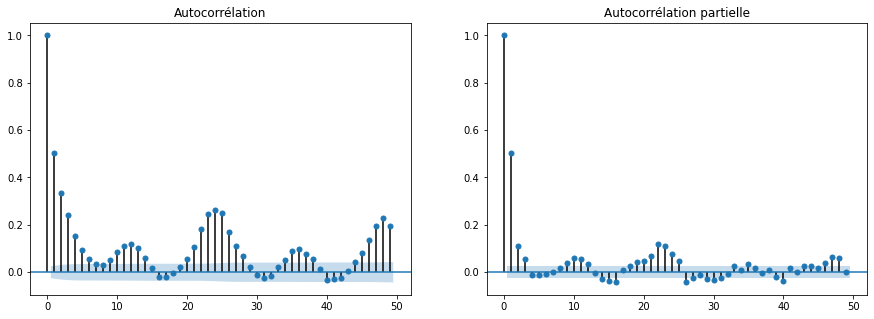

In [140]:
# ACF & PACF du bruit blanc

serie = df_heure2['Global_active_power'].values

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
f1.subplots_adjust(hspace=0.3,wspace=0.2)

plot_acf(serie, ax=ax1, lags = range(0,50))
ax1.set_title("Autocorrélation")

plot_pacf(serie, ax=ax2, lags = range(0, 50))
ax2.set_title("Autocorrélation partielle")

# Séparation des données de test et d'entrainement

In [141]:
# Sépare les données en entrainement et tests
pourcentage = 0.8
temps_separation = int(len(df_heure2['Global_active_power'].values) * pourcentage)
date_separation = X.index[temps_separation]

serie_entrainement_X = np.array(df_heure2['Global_active_power'].values[:temps_separation],dtype=np.float32)
serie_test_X = np.array(df_heure2['Global_active_power'].values[temps_separation:],dtype=np.float32)

print("Taille de l'entrainement : %d" %len(serie_entrainement_X))
print("Taille de la validation : %d" %len(serie_test_X))

Taille de l'entrainement : 4800
Taille de la validation : 1200


**Normalisation des données :**

On normalise les données à l'aide de la fonction [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [142]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
serie_entrainement_X_norm = min_max_scaler.fit_transform(tf.reshape(serie_entrainement_X,shape=(len(serie_entrainement_X),1)))
serie_test_X_norm = min_max_scaler.fit_transform(tf.reshape(serie_test_X,shape=(len(serie_test_X),1)))

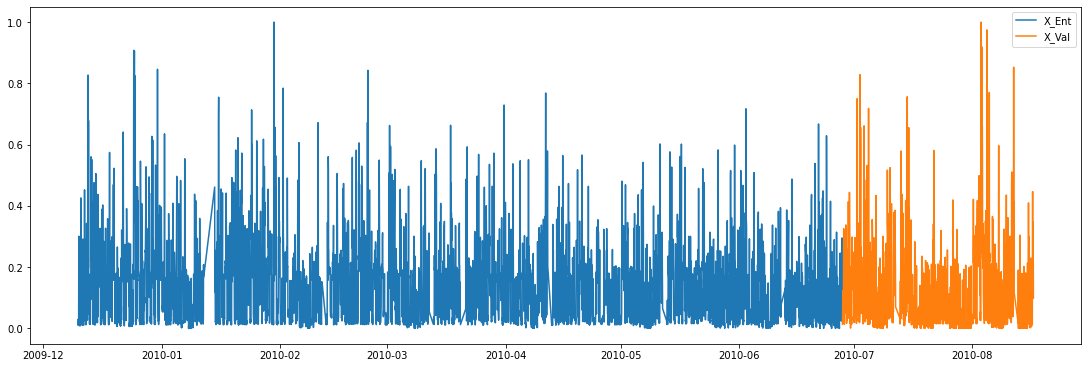

In [144]:
# Affiche la série
fig, ax = plt.subplots(constrained_layout=True, figsize=(15,5))

ax.plot(df_heure2.index[:temps_separation].values,serie_entrainement_X_norm, label="X_Ent")
ax.plot(df_heure2.index[temps_separation:].values,serie_test_X_norm, label="X_Val")

ax.legend()
plt.show()

# Création des datasets

In [145]:
# Fonction permettant de créer un dataset à partir des données de la série temporelle

def prepare_dataset_XY(series, longueur_sequence, longueur_sortie, batch_size,shift):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(longueur_sequence+longueur_sortie, shift=shift, drop_remainder=True)
  dataset = dataset.flat_map(lambda x: x.batch(longueur_sequence + longueur_sortie))
  dataset = dataset.map(lambda x: (x[0:longueur_sequence][:,:],tf.expand_dims(x[-longueur_sortie:][:,0],1)))
  dataset = dataset.batch(batch_size,drop_remainder=True).prefetch(1)
  return dataset

In [146]:
# Définition des caractéristiques du dataset que l'on souhaite créer
batch_size = 16
longueur_sequence = 40
longueur_sortie = 6
shift=1

# Création du dataset
dataset = prepare_dataset_XY(serie_entrainement_X_norm,longueur_sequence,longueur_sortie,batch_size,shift)
dataset_val = prepare_dataset_XY(serie_test_X_norm,longueur_sequence,longueur_sortie,batch_size,shift)

In [147]:
print(len(list(dataset.as_numpy_iterator())))
for element in dataset.take(1):
  print(element[0].shape)
  print(element[1].shape)

297
(16, 40, 1)
(16, 6, 1)


In [148]:
print(len(list(dataset_val.as_numpy_iterator())))
for element in dataset_val.take(1):
  print(element[0].shape)
  print(element[1].shape)

72
(16, 40, 1)
(16, 6, 1)


On extrait maintenant les deux tenseurs (X,Y) pour l'entrainement :

In [149]:
# Extrait les X,Y du dataset
x,y = tuple(zip(*dataset))              # #60x((32,5,779),(32,5,1)) => x = 60x(32,5,779) ; y = 60x(32,5,1)

# Recombine les données
x = np.asarray(x,dtype=np.float32)      # 60x(32,5,779) => (60,32,5,779)
y = np.asarray(y,dtype=np.float32)      # 60x(32,5,1) => (60,32,5,1)

x_train = np.asarray(tf.reshape(x,shape=(x.shape[0]*x.shape[1],longueur_sequence,x.shape[3])))     # (60,32,5,779) => (60*32,5,779)
y_train = np.asarray(tf.reshape(y,shape=(y.shape[0]*y.shape[1],longueur_sortie,y.shape[3])))     # (60,32,5,1) => (60*32,5,1)

# Affiche les formats
print(x_train.shape)
print(y_train.shape)

(4752, 40, 1)
(4752, 6, 1)


Puis la même chose pour les données de validation :

In [150]:
# Extrait les X,Y du dataset
x,y = tuple(zip(*dataset_val))

# Recombine les données
x = np.asarray(x,dtype=np.float32)
y = np.asarray(y,dtype=np.float32)

x_val = np.asarray(tf.reshape(x,shape=(x.shape[0]*x.shape[1],longueur_sequence,x.shape[3])))
y_val = np.asarray(tf.reshape(y,shape=(y.shape[0]*y.shape[1],longueur_sortie,y.shape[3])))

# Affiche les formats
print(x_val.shape)
print(y_val.shape)

(1152, 40, 1)
(1152, 6, 1)


# Affichage des séries

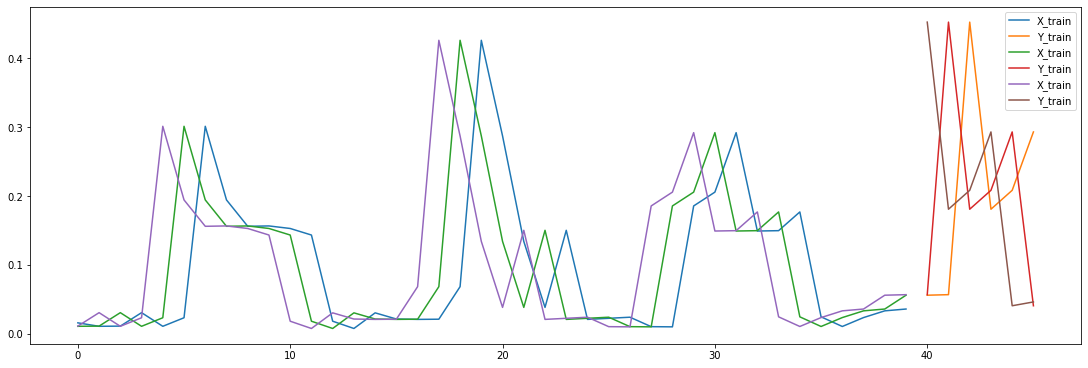

In [151]:
# Affiche la série
fig, ax = plt.subplots(constrained_layout=True, figsize=(15,5))

for i in range(0,3):
  ax.plot(np.linspace(0,longueur_sequence-1,longueur_sequence),x_train[i],label="X_train")
  ax.plot(np.linspace(longueur_sequence,longueur_sequence+longueur_sortie-1,longueur_sortie),y_train[i],label="Y_train")

ax.legend()
plt.show()

# Création du modèle Seq2Seq basique

Notre modèle Séquence vers Séquence est composé :
- D'un encodeur, qui comprend une couche GRU uni-directionnelle
- D'un décodeur, qui comprend une couche GRU uni-directionnelle. De plus, deux couches denses sont utilisées pour recréer la sortie univariée à partir des sorties des cellules GRU.

<img src='https://github.com/AlexandreBourrieau/FICHIERS/blob/main/Series_Temporelles/Seq2Seq/images/Seq2Seq_basique.png?raw=true' />

**1. Création de la couche d'encodeur**

In [152]:
class Encodeur(tf.keras.layers.Layer):
  def __init__(self, dim_GRU, regul=0.0, drop=0.0):
    self.regul = regul
    self.dim_GRU = dim_GRU            # Dimension des vecteurs cachés
    self.drop = drop
    super().__init__()                # Appel du __init__() de la classe Layer
  
  def build(self,input_shape):
    self.couche_GRU = tf.keras.layers.GRU(self.dim_GRU,kernel_regularizer=tf.keras.regularizers.l2(self.regul),return_sequences=False,return_state=True,dropout=self.drop,name="GRU_Encodeur")
    super().build(input_shape)        # Appel de la méthode build()

  # Entrées :
  #     input:    Entrée encodeur       : (batch_size,1,1) 
  #     hidden:   Vecteur caché         : (batch_size,1,128)
  # Sorties :
  #     out_enc : Sortie encodeur       : (batch_size,1,128)
  #     out_hid : Sortie vecteur caché  : (batch_size,1,128)
  def call(self, input, hidden=None):
    out_enc, out_hid = self.couche_GRU(input,initial_state=hidden)
    return out_enc, out_hid


**2. Création de la couche de décodeur**

In [153]:
class Decodeur(tf.keras.layers.Layer):
  def __init__(self,dim_GRU, regul=0.0, drop=0.0, unit=16):
    self.regul = regul
    self.dim_GRU = dim_GRU            # Dimension des vecteurs cachés
    self.drop = drop
    self.init_state = True
    self.unit = unit
    super().__init__()                # Appel du __init__() de la classe Layer
  
  def build(self,input_shape):
    self.couche_GRU = tf.keras.layers.GRU(self.dim_GRU,kernel_regularizer=tf.keras.regularizers.l2(self.regul),return_sequences=False,return_state=True,dropout=self.drop,name="GRU_Decodeur")
    self.couche_Dense1 = tf.keras.layers.Dense(units=self.unit,kernel_regularizer=tf.keras.regularizers.l2(self.regul),input_dim=self.dim_GRU,activation="relu")
    self.couche_Dense2 = tf.keras.layers.Dense(units=1,kernel_regularizer=tf.keras.regularizers.l2(self.regul),input_dim=16)
    super().build(input_shape)        # Appel de la méthode build()

  # Entrées :
  #     input:    Entrée décodeur       : (batch_size,1,1) 
  #     hidden:   Vecteur caché         : (batch_size,1,128)
  # Sorties :
  #     out_dec : Sortie décodeur       : (batch_size,1,1)
  #     out_hid : Sortie vecteur caché  : (batch_size,1,128)
  def call(self,input,hidden=None):
    if self.init_state == True:
      out_dec, out_hid = self.couche_GRU(input)
      self.init_state = False
    else:
      out_dec, out_hid = self.couche_GRU(input,initial_state=hidden)
    out_dec = self.couche_Dense1(out_dec)
    out_dec = self.couche_Dense2(out_dec)
    return out_dec, out_hid

**3. Création de la couche réseau**

In [154]:
class Net_GRU(tf.keras.layers.Layer):
  def __init__(self,encodeur,decodeur,longueur_sequence, longueur_sortie, regul=0.0):
    self.encodeur = encodeur
    self.decodeur = decodeur
    self.longueur_sequence = longueur_sequence
    self.longueur_sortie = longueur_sortie
    self.regul = regul
    self.dim_GRU = dim_GRU
    super().__init__()                # Appel du __init__() de la classe Layer
  
  def build(self,input_shape):
    super().build(input_shape)        # Appel de la méthode build()

  # Entrées :
  #     input:      Entrée réseau         : (batch_size,longueur_sequence,1) 
  #     output_seq  Sorties réelles       : (batch_size, longueur_sortie,1)
  # Sorties :
  def call(self,input,output_seq,training=False):
    longueur_entree = input.shape[1]
    sortie = []

    enc_out, enc_hid = self.encodeur(input[:,0:1,:])

    for i in range(1,longueur_entree):
      enc_out, enc_hid = self.encodeur(input[:,i:i+1,:],enc_hid)

    dec_input = tf.expand_dims(input[:,-1,:],1)
    dec_hid = enc_hid

    if (training == False):
      for i in range(0,self.longueur_sortie):
        dec_out, dec_hid = self.decodeur(dec_input, dec_hid)
        dec_input = tf.expand_dims(dec_out,-1)
        sortie.append(dec_out)
      sortie = tf.convert_to_tensor(tf.transpose(sortie, perm=[1,0,2]))
    else:
      for i in range(0,self.longueur_sortie):
        dec_out, dec_hid = self.decodeur(dec_input, dec_hid)
        dec_input = tf.expand_dims(output_seq[:,i,:],1)
        sortie.append(dec_out)
      sortie = tf.convert_to_tensor(tf.transpose(sortie, perm=[1,0,2]))

    return sortie

**4. Création du modèle**

In [156]:
class CustomModel(keras.Model):
    def train_step(self, data):
        x, y = data

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # Forward pass
            loss = self.compiled_loss(y, y_pred, regularization_losses=self.losses)

        # Calcul du gradient
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Optimisation des poids
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Mise à jour des métriques
        self.compiled_metrics.update_state(y, y_pred)

        # Retourne un dictionnaire avec les résultats
        return {m.name: m.result() for m in self.metrics}

    def test_step(self, data):
        x, y = data

        # Calcul des predictions
        y_pred = self(x, training=False)

        # Mise à jour des erreurs
        self.compiled_loss(y, y_pred, regularization_losses=self.losses)

        # Mise à jour des métriques
        self.compiled_metrics.update_state(y, y_pred)

        # Retourne un dictionnaire avec les résultats
        return {m.name: m.result() for m in self.metrics}

In [176]:
dim_GRU = 100
drop=0.0
unit_dense = 4

entrees_sequences = tf.keras.layers.Input(shape=(longueur_sequence,1))
sorties_sequences = tf.keras.layers.Input(shape=(longueur_sortie,1))


encodeur = Encodeur(dim_GRU=dim_GRU,drop=drop)
decodeur = Decodeur(dim_GRU=dim_GRU,drop=drop,unit=unit_dense)

sortie = Net_GRU(encodeur,decodeur,longueur_sequence=longueur_sequence, longueur_sortie=longueur_sortie)(entrees_sequences,sorties_sequences)

model = CustomModel([entrees_sequences,sorties_sequences],sortie)
model.summary()

Model: "custom_model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 40, 1)]      0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 6, 1)]       0                                            
__________________________________________________________________________________________________
net_gru_1 (Net_GRU)             (None, 6, 1)         62209       input_3[0][0]                    
                                                                 input_4[0][0]                    
Total params: 62,209
Trainable params: 62,209
Non-trainable params: 0
__________________________________________________________________________________________________


# Entrainement du modèle

In [160]:
# Définition de la fonction de régulation du taux d'apprentissage
def RegulationTauxApprentissage(periode, taux):
  return 1e-8*10**(periode/10)

# Définition de l'optimiseur à utiliser
optimiseur=tf.keras.optimizers.Adam()

# Compile le modèle
model.compile(loss="mse", optimizer=optimiseur, metrics=["mse"])

# Utilisation de la méthode ModelCheckPoint
CheckPoint = tf.keras.callbacks.ModelCheckpoint("poids.hdf5", monitor='mse', verbose=1, save_best_only=True, save_weights_only = True, mode='auto', save_freq='epoch')

# Entraine le modèle en utilisant notre fonction personnelle de régulation du taux d'apprentissage
#historique = model.fit(dataset,epochs=100,verbose=1, callbacks=[tf.keras.callbacks.LearningRateScheduler(RegulationTauxApprentissage), CheckPoint])
historique = model.fit(x=[x_train,y_train],y=y_train, epochs=100,verbose=1, callbacks=[tf.keras.callbacks.LearningRateScheduler(RegulationTauxApprentissage), CheckPoint], batch_size=256)

Epoch 1/100
19/19 [==============================] - 49s 53ms/step - loss: 0.0375 - mse: 0.0375

Epoch 00001: mse improved from inf to 0.03747, saving model to poids.hdf5
Epoch 2/100
19/19 [==============================] - 1s 51ms/step - loss: 0.0374 - mse: 0.0374

Epoch 00002: mse improved from 0.03747 to 0.03744, saving model to poids.hdf5
Epoch 3/100
19/19 [==============================] - 1s 55ms/step - loss: 0.0374 - mse: 0.0374

Epoch 00003: mse did not improve from 0.03744
Epoch 4/100
19/19 [==============================] - 1s 54ms/step - loss: 0.0374 - mse: 0.0374

Epoch 00004: mse improved from 0.03744 to 0.03742, saving model to poids.hdf5
Epoch 5/100
19/19 [==============================] - 1s 54ms/step - loss: 0.0374 - mse: 0.0374

Epoch 00005: mse did not improve from 0.03742
Epoch 6/100
19/19 [==============================] - 1s 53ms/step - loss: 0.0374 - mse: 0.0374

Epoch 00006: mse improved from 0.03742 to 0.03741, saving model to poids.hdf5
Epoch 7/100
19/19 [====

Text(0.5, 1.0, "Evolution de l'erreur en fonction du taux d'apprentissage")

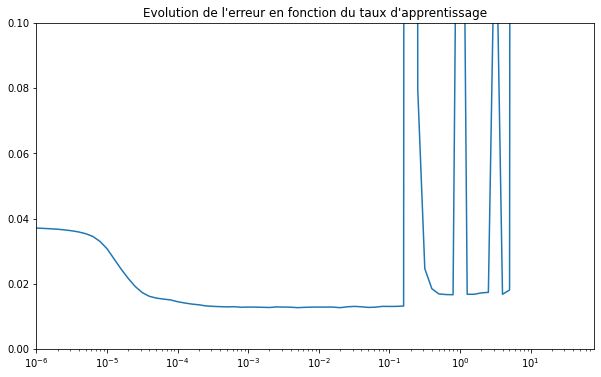

In [162]:
# Construit un vecteur avec les valeurs du taux d'apprentissage à chaque période 
taux = 1e-8*(10**(np.arange(100)/10))

# Affiche l'erreur en fonction du taux d'apprentissage
plt.figure(figsize=(10, 6))
plt.semilogx(taux,historique.history["loss"])
plt.axis([ taux[20], taux[99], 0, 0.1])
plt.title("Evolution de l'erreur en fonction du taux d'apprentissage")

In [163]:
# Chargement des poids sauvegardés
model.load_weights("poids.hdf5")

In [177]:
from google.colab import files

max_periodes = 500

# Classe permettant d'arrêter l'entrainement si la variation
# devient plus petite qu'une valeur à choisir sur un nombre
# de périodes à choisir
class StopTrain(keras.callbacks.Callback):
    def __init__(self, delta=0.01,periodes=100, term="loss", logs={}):
      self.n_periodes = 0
      self.periodes = periodes
      self.loss_1 = 100
      self.delta = delta
      self.term = term
    def on_epoch_end(self, epoch, logs={}):
      diff_loss = abs(self.loss_1 - logs[self.term])
      self.loss_1 = logs[self.term]
      if (diff_loss < self.delta):
        self.n_periodes = self.n_periodes + 1
      else:
        self.n_periodes = 0
      if (self.n_periodes == self.periodes):
        print("Arrêt de l'entrainement...")
        self.model.stop_training = True


# Définition des paramètres liés à l'évolution du taux d'apprentissage
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.01,
    decay_steps=10,
    decay_rate=0.001)

optimiseur=tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Utilisation de la méthode ModelCheckPoint
CheckPoint = tf.keras.callbacks.ModelCheckpoint("poids_train.hdf5", monitor='loss', verbose=1, save_best_only=True, save_weights_only = True, mode='auto', save_freq='epoch')

# Compile le modèle
model.compile(loss="mse", optimizer=optimiseur, metrics="mse")

# Entraine le modèle
historique = model.fit(x=[x_train,y_train],y=y_train,validation_data=([x_val,y_val],y_val), epochs=max_periodes,verbose=1, callbacks=[CheckPoint,StopTrain(delta=1e-6,periodes = 10, term="loss")],batch_size=batch_size)


files.download('poids_train.hdf5')

Epoch 1/500
297/297 [==============================] - 59s 73ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0202 - val_mse: 0.0202

Epoch 00001: loss improved from inf to 0.01285, saving model to poids_train.hdf5
Epoch 2/500
297/297 [==============================] - 12s 40ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0188 - val_mse: 0.0188

Epoch 00002: loss improved from 0.01285 to 0.01222, saving model to poids_train.hdf5
Epoch 3/500
297/297 [==============================] - 12s 40ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0198 - val_mse: 0.0198

Epoch 00003: loss improved from 0.01222 to 0.01221, saving model to poids_train.hdf5
Epoch 4/500
297/297 [==============================] - 12s 40ms/step - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0186 - val_mse: 0.0186

Epoch 00004: loss improved from 0.01221 to 0.01211, saving model to poids_train.hdf5
Epoch 5/500
297/297 [==============================] - 12s 40ms/step - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0186 - v

KeyboardInterrupt: ignored

In [178]:
model.load_weights("poids_train.hdf5")

Text(0.5, 1.0, "Evolution de l'erreur en fonction de la période")

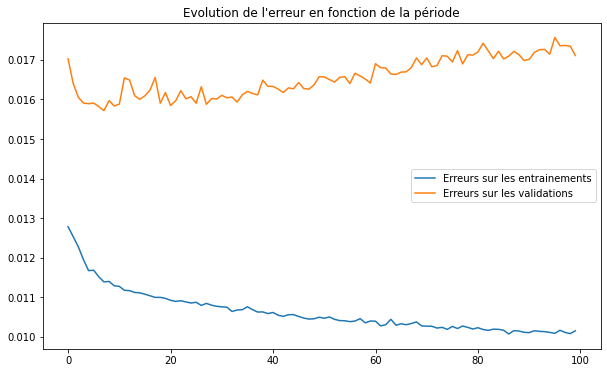

In [179]:
erreur_entrainement = historique.history["loss"]
erreur_validation = historique.history["val_loss"]

# Affiche l'erreur en fonction de la période
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0,len(erreur_entrainement)),erreur_entrainement, label="Erreurs sur les entrainements")
plt.plot(np.arange(0,len(erreur_entrainement)),erreur_validation, label ="Erreurs sur les validations")
plt.legend()

plt.title("Evolution de l'erreur en fonction de la période")

In [180]:
model.evaluate(x=[x_train,y_train],y=y_train)
model.evaluate(x=[x_val,y_val],y=y_val)

36/36 [==============================] - 1s 16ms/step - loss: 0.0244 - mse: 0.0244


[0.024378616362810135, 0.024378610774874687]

# Prédictions

In [294]:
pred_ent = model.predict([x_train,y_train],verbose=1)
pred_val = model.predict([x_val,y_val],verbose=1)

36/36 [==============================] - 1s 16ms/step


In [296]:
pred_ent.shape

(4752, 6, 1)

In [304]:
df_heure2

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
2009-12-10 01:00:00,12/10/2009 01:00:00,0.274,0.000,241.160004,1.4,0.0,0.0,1.0
2009-12-10 02:00:00,12/10/2009 02:00:00,0.236,0.000,241.360001,1.0,0.0,0.0,1.0
2009-12-10 03:00:00,12/10/2009 03:00:00,0.238,0.000,242.850006,1.0,0.0,0.0,1.0
2009-12-10 04:00:00,12/10/2009 04:00:00,0.386,0.196,243.710007,1.8,0.0,1.0,1.0
2009-12-10 05:00:00,12/10/2009 05:00:00,0.236,0.000,242.630005,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2010-08-16 20:00:00,16/8/2010 20:00:00,0.750,0.252,241.630005,3.2,0.0,0.0,1.0
2010-08-16 21:00:00,16/8/2010 21:00:00,2.232,0.222,237.119995,9.4,0.0,0.0,18.0
2010-08-16 22:00:00,16/8/2010 22:00:00,2.230,0.272,237.979996,9.4,0.0,0.0,11.0


In [307]:
df_heure2.iloc[0:longueur_sequence,:]

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
2009-12-10 01:00:00,12/10/2009 01:00:00,0.274,0.000,241.160004,1.4,0.0,0.0,1.0
2009-12-10 02:00:00,12/10/2009 02:00:00,0.236,0.000,241.360001,1.0,0.0,0.0,1.0
2009-12-10 03:00:00,12/10/2009 03:00:00,0.238,0.000,242.850006,1.0,0.0,0.0,1.0
2009-12-10 04:00:00,12/10/2009 04:00:00,0.386,0.196,243.710007,1.8,0.0,1.0,1.0
2009-12-10 05:00:00,12/10/2009 05:00:00,0.236,0.000,242.630005,1.0,0.0,0.0,1.0
2009-12-10 06:00:00,12/10/2009 06:00:00,0.330,0.082,240.529999,1.6,0.0,1.0,1.0
2009-12-10 07:00:00,12/10/2009 07:00:00,2.436,0.000,238.399994,10.2,0.0,0.0,18.0
2009-12-10 08:00:00,12/10/2009 08:00:00,1.626,0.000,237.199997,6.8,1.0,0.0,18.0
2009-12-10 09:00:00,12/10/2009 09:00:00,1.336,0.048,238.220001,5.6,1.0,0.0,18.0


In [309]:
import plotly.graph_objects as go

decalage = longueur_sortie
#decalage = 1

fig = go.Figure()

# Courbes originales
fig.add_trace(go.Scatter(x=X.index,y=serie_entrainement_X_norm[:,0],line=dict(color='blue', width=1)))
fig.add_trace(go.Scatter(x=X.index[temps_separation:],y=serie_test_X_norm[:,0],line=dict(color='red', width=1)))

#Affiche les prédictions sur l'entrainement
pred = []
pred_index = []
step_time = []
step_val = []

max = len(pred_ent)
max = 2
for i in range(0,max):
  pred.append(tf.squeeze(pred_ent[i,0:decalage,:],1))
  pred_index.append(X.index[i*decalage+longueur_sequence+1:i*decalage+longueur_sequence+1+longueur_sortie])

  step_time.append(X.index[i*decalage+longueur_sequence+1])
  step_val.append(pred_ent[i,0,0])

pred = tf.convert_to_tensor(pred)
pred = tf.reshape(pred,shape=(pred.shape[0]*pred.shape[1]))
pred_index = np.asarray(pred_index)
pred_index = np.reshape(pred_index,(pred_index.shape[0]*pred_index.shape[1]))

fig.add_trace(go.Scatter(x=pd.to_datetime(pred_index),y=pred, mode='lines', line=dict(color='green', width=1)))

fig.add_trace(go.Scatter(x=step_time,y=step_val, mode='markers', line=dict(color='black', width=1)))


#Affiche les prédictions sur les validations
pred = []
max = len(pred_val)
max = 1
#for i in range(0,max):
#  pred.append(tf.squeeze(pred_val[i,0:decalage,:],1))
#toto = tf.convert_to_tensor(pred)
#toto = tf.reshape(toto,shape=(toto.shape[0]*toto.shape[1]))
#fig.add_trace(go.Scatter(x=X.index[temps_separation+longueur_sequence:temps_separation+longueur_sequence+max],y=toto, mode='lines', line=dict(color='green', width=1)))



fig.update_xaxes(rangeslider_visible=True)
yaxis=dict(autorange = True,fixedrange= False)
fig.update_yaxes(yaxis)
fig.show()

In [ ]:
tf.squeeze(tf.convert_to_tensor(pred),1)

In [ ]:
for i in range(0,3):
  pred = tf.squeeze(pred_ent[i+shift-1,0:1,:],1)

  fig.add_trace(go.Scatter(x=X_norm.index[(i+1)*longueur_sequence:(2+i)*(longueur_sequence+longueur_sortie)],y=pred,line=dict(color='green', width=1)))

#  fig.add_trace(go.Scatter(x=X_norm.index[i*longueur_sequence:(1+i)*(longueur_sequence+longueur_sortie)],y=train,line=dict(color='green', width=1)))

In [ ]:
pred_ent